# Version 3

Enter the number of neurons in the input layer:  2
Enter the number of hidden layers:  3
Enter the number of neurons in hidden layer 1:  3
Enter the number of neurons in hidden layer 2:  2
Enter the number of neurons in hidden layer 3:  2
Enter the number of neurons in the output layer:  2



Welcome to Neural Network Quest!
Your mission: guide your signal from an input neuron to the target output neuron.
Target Output Neuron: O1
At each step, choose a connection. Your activation gets multiplied by the connection's weight.
Keep your activation above 0.2 to survive the journey.

Input Neurons:
1. I0
2. I1


Choose your starting input neuron (enter number):  2


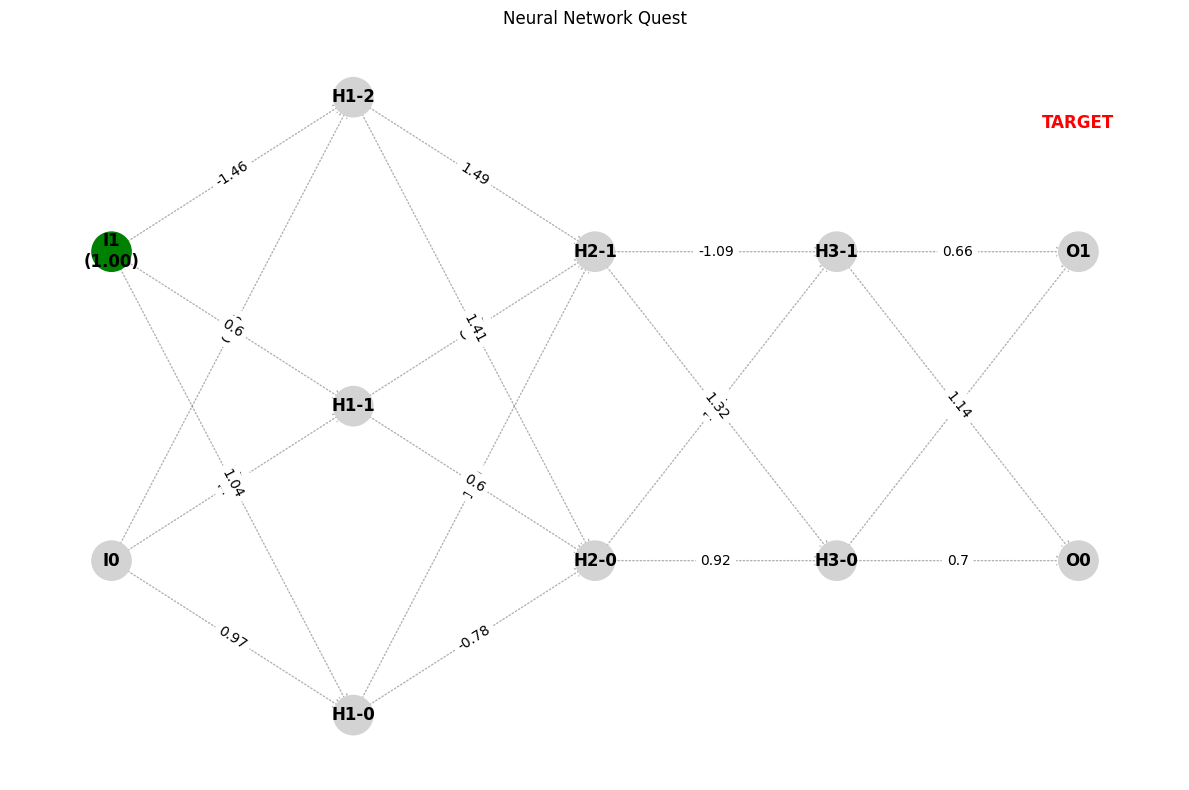


Current node: I1 with activation: 1.00
Choose one of the connections to a node in the 'hidden1' layer:
1. To H1-0 with weight 1.04
2. To H1-1 with weight 0.6
3. To H1-2 with weight -1.46


Enter the number of your chosen connection:  2


After moving along the connection with weight 0.6, your activation is now 0.60.


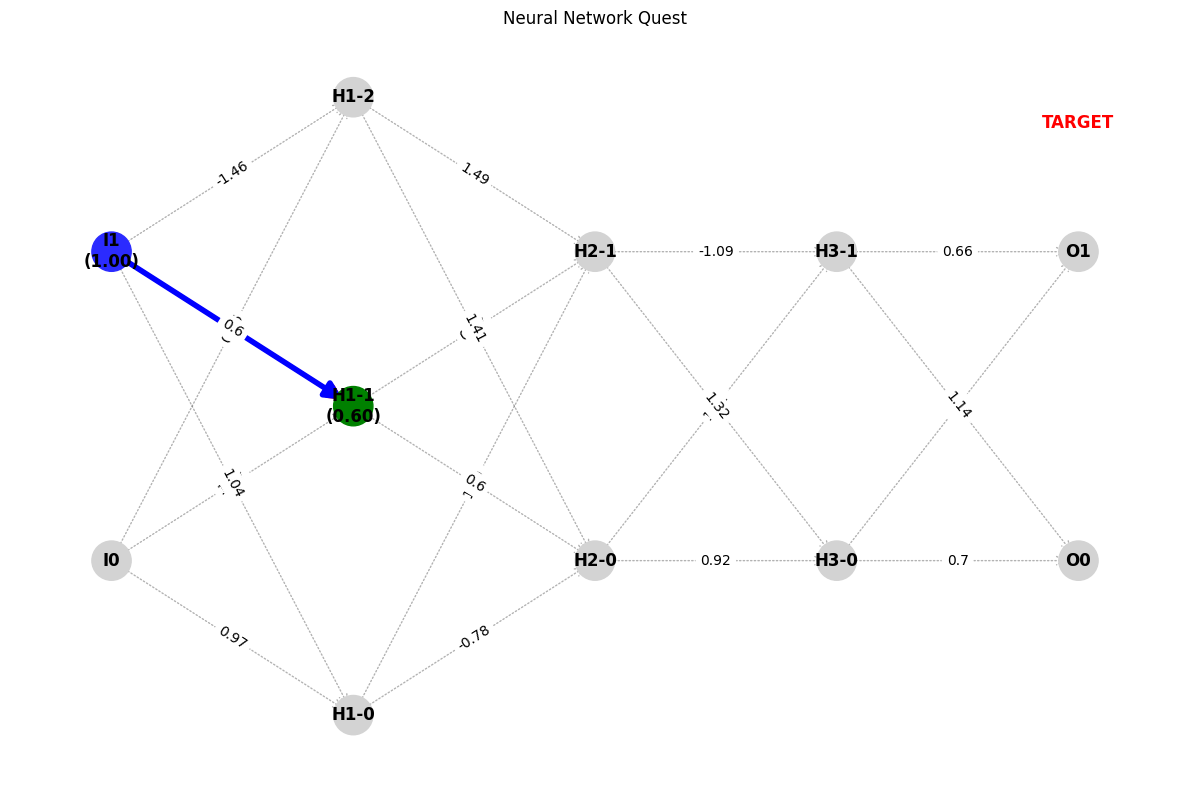


Current node: H1-1 with activation: 0.60
Choose one of the connections to a node in the 'hidden2' layer:
1. To H2-0 with weight 0.6
2. To H2-1 with weight 0.57


Enter the number of your chosen connection:  1


After moving along the connection with weight 0.6, your activation is now 0.36.


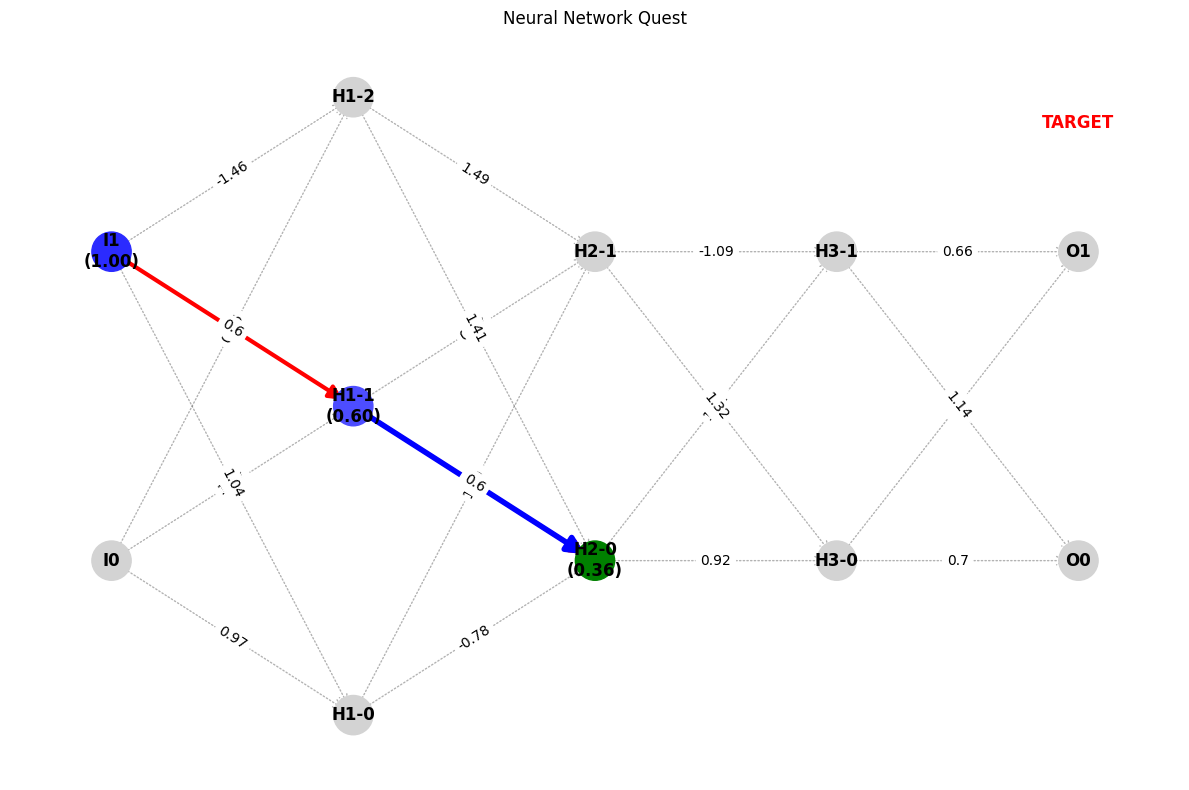


Current node: H2-0 with activation: 0.36
Choose one of the connections to a node in the 'hidden3' layer:
1. To H3-0 with weight 0.92
2. To H3-1 with weight 1.31


Enter the number of your chosen connection:  2


After moving along the connection with weight 1.31, your activation is now 0.47.


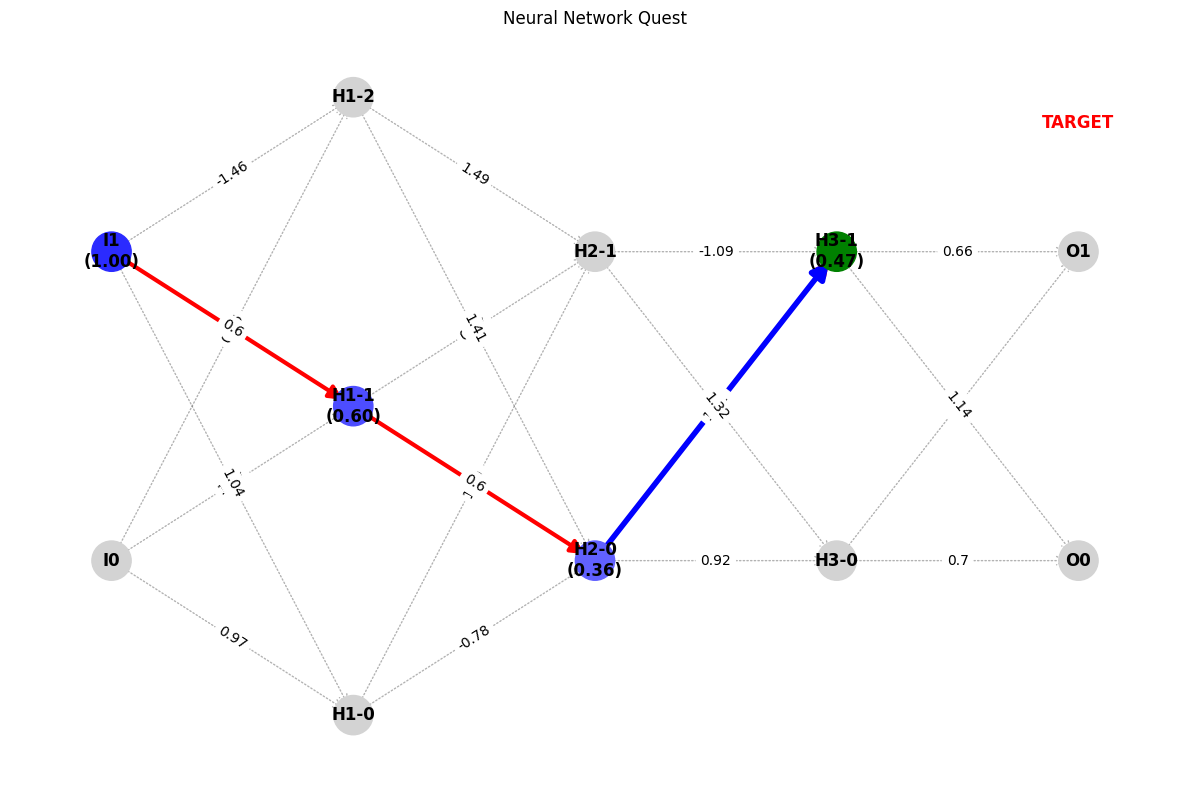


Current node: H3-1 with activation: 0.47
Choose one of the connections to a node in the 'output' layer:
1. To O0 with weight 1.14
2. To O1 with weight 0.66


Enter the number of your chosen connection:  2


After moving along the connection with weight 0.66, your activation is now 0.31.


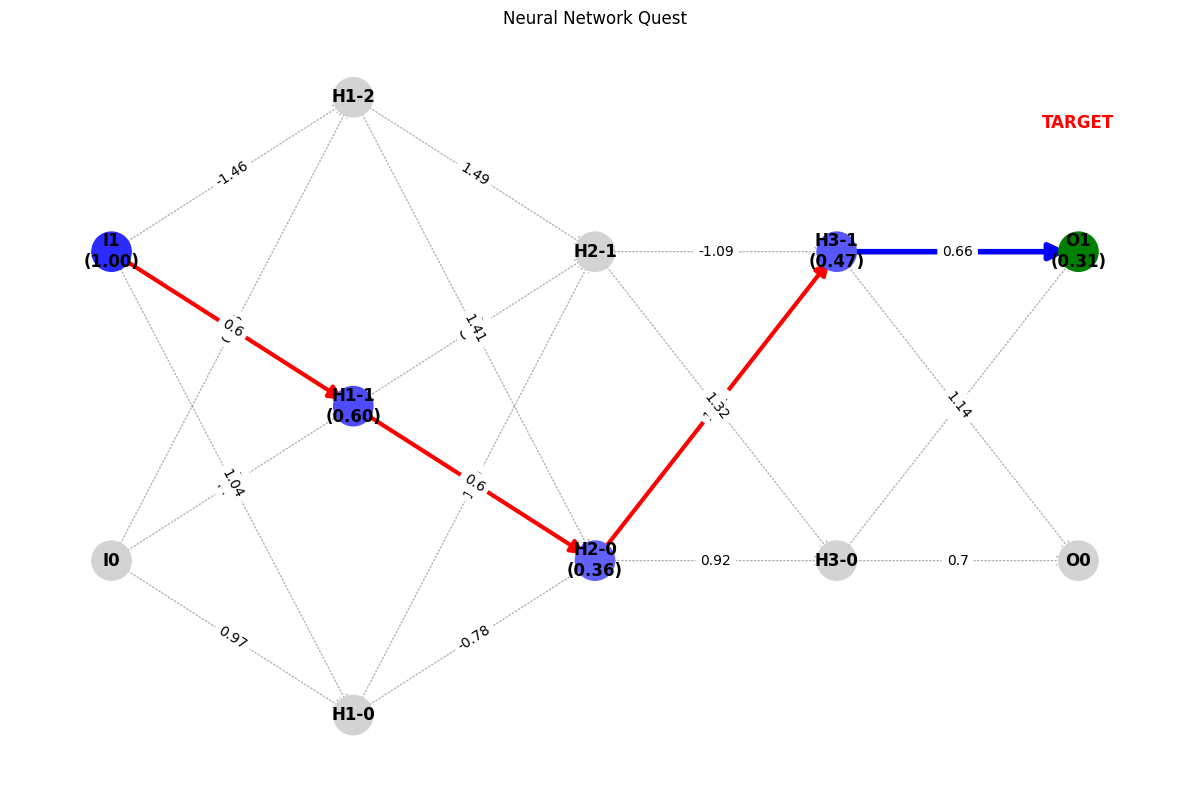

Congratulations! You reached the target output neuron O1 with activation 0.31.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import time


random.seed(time.time())

def get_network_configuration():
    try:
        num_input = int(input("Enter the number of neurons in the input layer: "))
    except:
        print("Invalid input. Defaulting to 3 input neurons.")
        num_input = 3

    try:
        num_hidden_layers = int(input("Enter the number of hidden layers: "))
    except:
        print("Invalid input. Defaulting to 1 hidden layer.")
        num_hidden_layers = 1

    hidden_layers = []
    for i in range(num_hidden_layers):
        try:
            neurons = int(input(f"Enter the number of neurons in hidden layer {i+1}: "))
        except:
            print("Invalid input. Defaulting to 4 neurons in this layer.")
            neurons = 4
        hidden_layers.append(neurons)

    try:
        num_output = int(input("Enter the number of neurons in the output layer: "))
    except:
        print("Invalid input. Defaulting to 2 output neurons.")
        num_output = 2

    return num_input, hidden_layers, num_output

num_input, hidden_layers, num_output = get_network_configuration()

layers = {}
layers["input"] = [f"I{i}" for i in range(num_input)]
for idx, count in enumerate(hidden_layers, start=1):
    layers[f"hidden{idx}"] = [f"H{idx}-{i}" for i in range(count)]
layers["output"] = [f"O{i}" for i in range(num_output)]

G = nx.DiGraph()

for layer_name, nodes in layers.items():
    for node in nodes:
        G.add_node(node, layer=layer_name)

def random_weight():
    if random.random() < 0.7:
        return round(random.uniform(0.5, 1.5), 2)
    else:
        return round(random.uniform(-1.5, -0.5), 2)

layer_keys = list(layers.keys())
for i in range(len(layer_keys)-1):
    current_layer = layers[layer_keys[i]]
    next_layer = layers[layer_keys[i+1]]
    for u in current_layer:
        for v in next_layer:
            w = random_weight()
            G.add_edge(u, v, weight=w)

target_output = random.choice(layers["output"])


def draw_network(current_node=None, activation_history=None, chosen_edge=None, path_edges=None):
    """
    Draws the neural network with enhanced visualization.
    
    Parameters:
      - current_node: The node where the signal is currently located.
      - activation_history: Dictionary mapping node -> activation value.
      - chosen_edge: The most recent edge chosen (tuple: (u, v)).
      - path_edges: List of edges that form the traversed path.
    """
    plt.figure(figsize=(12, 8))
    
    pos = {}
    num_layers = len(layers)
    layer_x_positions = {}
    for idx, key in enumerate(layer_keys):
        layer_x_positions[key] = idx 

    for layer in layer_keys:
        nodes = layers[layer]
        count = len(nodes)
        for i, node in enumerate(nodes):
            pos[node] = (layer_x_positions[layer], i - (count - 1) / 2)
    
    nx.draw_networkx_edges(G, pos, alpha=0.3, style='dotted', arrows=True, arrowstyle='->', arrowsize=15)
    
    if path_edges:
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red',
                               width=3, arrowstyle='-|>', arrowsize=20)
    
    if chosen_edge:
        nx.draw_networkx_edges(G, pos, edgelist=[chosen_edge], edge_color='blue',
                               width=4, style='solid', arrowstyle='-|>', arrowsize=25)
    
    node_colors = []
    labels = {}
    for node in G.nodes():
        if node == current_node:
            color = 'green'
        elif activation_history and node in activation_history:
            act = activation_history[node]
            norm = min(max(act / 1.5, 0), 1)  
            color = (0.5 - norm * 0.5, 0.5 - norm * 0.5, 1)
        else:
            color = 'lightgrey'
        node_colors.append(color)
        
        if activation_history and node in activation_history:
            labels[node] = f"{node}\n({activation_history[node]:.2f})"
        else:
            labels[node] = node
    
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800)
    nx.draw_networkx_labels(G, pos, labels=labels, font_weight='bold')
    
    edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    if target_output in pos:
        x, y = pos[target_output]
        plt.text(x, y + 0.4, 'TARGET', fontsize=12, color='red',
                 horizontalalignment='center', fontweight='bold')
    
    plt.title("Neural Network Quest")
    plt.axis('off')
    plt.tight_layout()
    plt.show()


def play_game():
    print("\nWelcome to Neural Network Quest!")
    print("Your mission: guide your signal from an input neuron to the target output neuron.")
    print(f"Target Output Neuron: {target_output}")
    print("At each step, choose a connection. Your activation gets multiplied by the connection's weight.")
    print("Keep your activation above 0.2 to survive the journey.\n")
    
    print("Input Neurons:")
    for i, node in enumerate(layers["input"]):
        print(f"{i+1}. {node}")
    start_choice = input("Choose your starting input neuron (enter number): ")
    try:
        start_idx = int(start_choice) - 1
        current_node = layers["input"][start_idx]
    except:
        print("Invalid choice. Defaulting to the first input neuron.")
        current_node = layers["input"][0]
    
    activation = 1.0  
    activation_history = {current_node: activation}
    traversed_path = []  
    
    draw_network(current_node=current_node, activation_history=activation_history)
    
    for idx in range(1, len(layer_keys)):
        current_layer_key = layer_keys[idx-1]
        next_layer_key = layer_keys[idx]
        
        possible_edges = [(current_node, v) for v in layers[next_layer_key] if G.has_edge(current_node, v)]
        if not possible_edges:
            print("No outgoing connections! Your signal is lost.")
            return
        
        print(f"\nCurrent node: {current_node} with activation: {activation:.2f}")
        print(f"Choose one of the connections to a node in the '{next_layer_key}' layer:")
        for i, (u, v) in enumerate(possible_edges):
            w = G[u][v]['weight']
            print(f"{i+1}. To {v} with weight {w}")
        
        choice = input("Enter the number of your chosen connection: ")
        try:
            choice_idx = int(choice) - 1
            chosen_edge = possible_edges[choice_idx]
        except:
            print("Invalid choice. Taking the first available connection.")
            chosen_edge = possible_edges[0]
        
        weight = G[chosen_edge[0]][chosen_edge[1]]['weight']
        activation *= weight
        current_node = chosen_edge[1]
        activation_history[current_node] = activation
        traversed_path.append(chosen_edge)
        
        print(f"After moving along the connection with weight {weight}, your activation is now {activation:.2f}.")
        if activation < 0.2:
            print("Your activation has dropped too low. The signal dies. Game Over!")
            draw_network(current_node=current_node,
                         activation_history=activation_history,
                         chosen_edge=chosen_edge,
                         path_edges=traversed_path)
            return
        
        draw_network(current_node=current_node,
                     activation_history=activation_history,
                     chosen_edge=chosen_edge,
                     path_edges=traversed_path)
    
    if current_node == target_output:
        print(f"Congratulations! You reached the target output neuron {target_output} with activation {activation:.2f}.")
    else:
        print(f"You reached output neuron {current_node} which is not the target ({target_output}). Game Over!")
        draw_network(current_node=current_node,
                     activation_history=activation_history,
                     path_edges=traversed_path)

if __name__ == "__main__":
    play_game()